In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("modules are imported")

modules are imported


In [46]:
# importing the dataset of covid 19

In [47]:
corona_ds=pd.read_csv('covid19_confirmed_dataset.csv')
corona_ds.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [48]:
corona_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


In [49]:
corona_ds['Country/Region'].value_counts()

China             33
Canada            15
United Kingdom    11
France            11
Australia          8
                  ..
Switzerland        1
Paraguay           1
Qatar              1
Haiti              1
Bahrain            1
Name: Country/Region, Length: 187, dtype: int64

In [50]:
corona_ds.shape

(266, 104)

## deleting the useless columns

In [51]:
corona_ds.drop(labels=['Lat','Long'],axis=1,inplace=True)

In [52]:
corona_ds.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregating the rows by the country

In [53]:
corona_aggregate=corona_ds.groupby(by='Country/Region').sum()

In [54]:
corona_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# Calculating a good measure
we need to find a good measure represented as number,describing the spread of the virus

Text(0, 0.5, 'Cases')

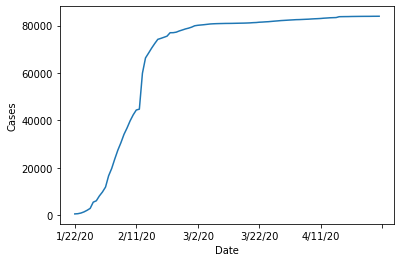

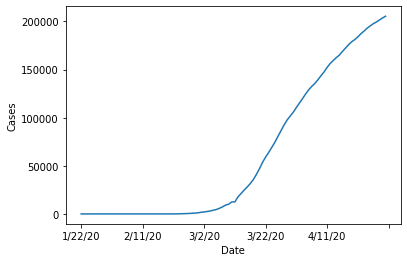

In [55]:
corona_aggregate.loc['China'].plot()
plt.xlabel('Date')
plt.ylabel('Cases')

plt.figure()
corona_aggregate.loc['Italy'].plot()
plt.xlabel('Date')
plt.ylabel('Cases')


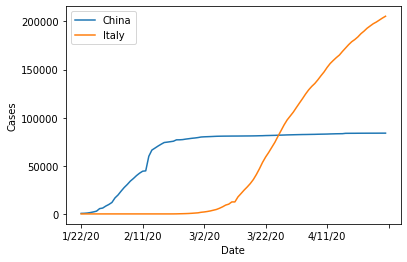

In [56]:
corona_aggregate.loc['China'].plot()

corona_aggregate.loc['Italy'].plot()
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()



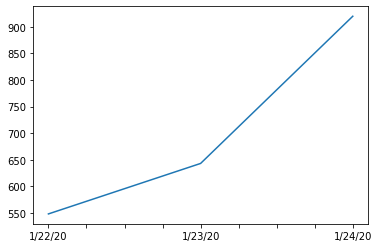

In [57]:
corona_aggregate.loc['China'][:3].plot()

### To determine the highest spike in the graph we can find the derivative graph

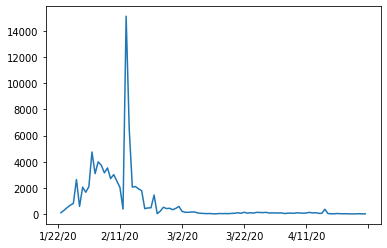

In [58]:
corona_aggregate.loc['China'].diff().plot()

for above graph we can find the max spike value by function below

In [59]:
corona_aggregate.loc['China'].diff().max()

15136.0

so in one day the 15136.0 new infected cases was reported

similarly for italy

In [60]:
corona_aggregate.loc['Italy'].diff().max()

6557.0

In [61]:
corona_aggregate.loc['Spain'].diff().max()

9630.0

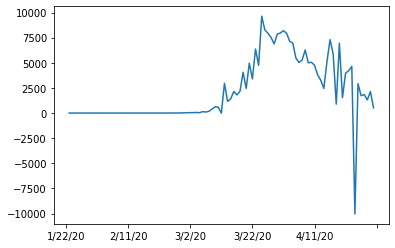

In [62]:
corona_aggregate.loc['Spain'].diff().plot()

### finding the max infection rate  for all the countries

In [63]:
countries=list(corona_aggregate.index)
max_infection_rates=[]
for  country in countries:
    max_infection_rates.append(corona_aggregate.loc[country].diff().max())

In [64]:
for rate,country in zip(max_infection_rates,countries):
    print('{:<25}  --  {:<8}'.format(country,rate))

Afghanistan                --  232.0   
Albania                    --  34.0    
Algeria                    --  199.0   
Andorra                    --  43.0    
Angola                     --  5.0     
Antigua and Barbuda        --  6.0     
Argentina                  --  291.0   
Armenia                    --  134.0   
Australia                  --  497.0   
Austria                    --  1321.0  
Azerbaijan                 --  105.0   
Bahamas                    --  7.0     
Bahrain                    --  301.0   
Bangladesh                 --  641.0   
Barbados                   --  12.0    
Belarus                    --  1485.0  
Belgium                    --  2454.0  
Belize                     --  4.0     
Benin                      --  19.0    
Bhutan                     --  1.0     
Bolivia                    --  104.0   
Bosnia and Herzegovina     --  92.0    
Botswana                   --  7.0     
Brazil                     --  7502.0  
Brunei                     --  26.0    


In [65]:
corona_aggregate['max infection rate']=max_infection_rates

In [66]:
corona_aggregate

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


# creating a new data frame with only needed column

In [67]:
corona_data=pd.DataFrame(corona_aggregate['max infection rate'])

In [68]:
corona_data

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


# task 4 : importing the dataset

In [83]:
h_ds=pd.read_csv('worldwide_happiness_report.csv')
h_ds.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [80]:
h_ds.index

RangeIndex(start=0, stop=156, step=1)

In [85]:
h_ds.drop(['Overall rank','Score','Perceptions of corruption','Generosity'],axis=1,inplace=True)

In [86]:
h_ds.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### changing the indices of the data frame for ease of joining 

In [87]:
h_ds.set_index("Country or region",inplace=True)

In [88]:
h_ds.index

Index(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland',
       'Sweden', 'New Zealand', 'Canada', 'Austria',
       ...
       'Haiti', 'Botswana', 'Syria', 'Malawi', 'Yemen', 'Rwanda', 'Tanzania',
       'Afghanistan', 'Central African Republic', 'South Sudan'],
      dtype='object', name='Country or region', length=156)

In [89]:
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [91]:
corona_data.shape

(187, 1)

In [92]:
h_ds.shape

(156, 4)

In [93]:
joineddata=corona_data.join(h_ds,how='inner')

In [94]:
joineddata

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


- ##### inner join returns us with a dataframe with common data entries

##  Task :correlation matrix to determine the corelation between corona cases and happiness

In [96]:
joineddata.corr()

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max infection rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


By the corelation matrix we can say that max infection rate and healthy life expectancy has the most correlation

# Task 5: visualization of the result

In [97]:
joineddata.head()

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### 5.1 plotting gdp vs maximum infection rate

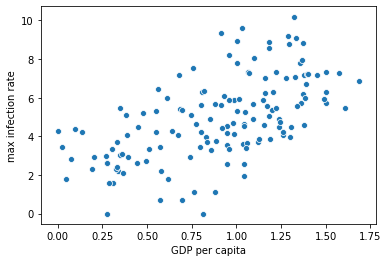

In [104]:
x=joineddata['GDP per capita']
y=joineddata['max infection rate']
sns.scatterplot(x,np.log(y))

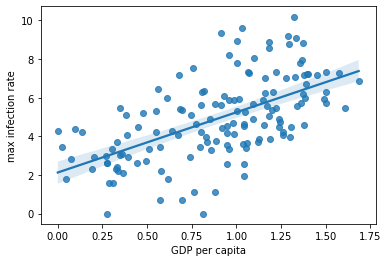

In [106]:
sns.regplot(x,np.log(y))

### task 5.2 plotting social support vs maximum infection rate

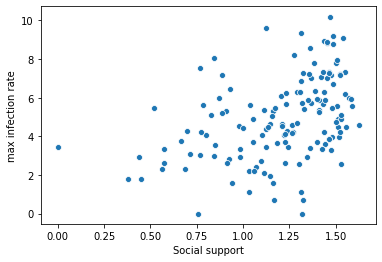

In [108]:
x=joineddata['Social support']
y=joineddata['max infection rate']
sns.scatterplot(x,np.log(y))

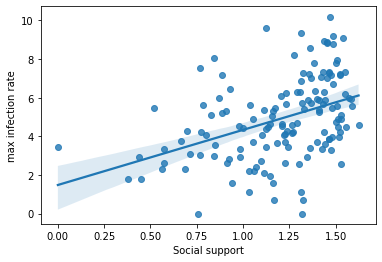

In [109]:
sns.regplot(x,np.log(y))

### plotting healthy life expectancy vs max infection rate

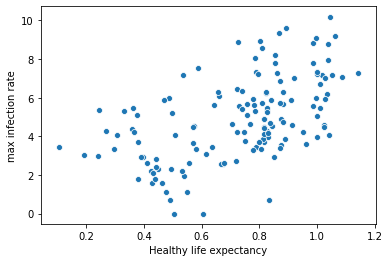

In [111]:
x=joineddata['Healthy life expectancy']
y=joineddata['max infection rate']
sns.scatterplot(x,np.log(y))

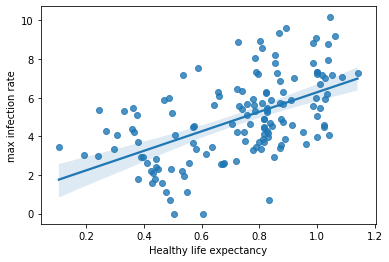

In [112]:
sns.regplot(x,np.log(y))